In [2]:
import sys
sys.path.append('..')
sys.path.append('.')

from diagnostic_assistant.preprocess.load_data import * 
from diagnostic_assistant.utils.utils import symptom_to_label, \
    label_to_symptom, disease_to_label, label_to_disease,\
    conver_dis_to_onhot, conver_to_onhot, convert_to_symptoms, convert_to_disease

print("symptom_to_label:")
print(symptom_to_label)
print("label_to_symptom:")
print(label_to_symptom)
print("disease_to_label:")
print(disease_to_label)
print("label_to_disease:")
print(label_to_disease)


max_len = 1
idx = 0
df_data = get_dataset()
# iterate through the dataset and convert the symptoms and diseases to labels
for idx, row in df_data.iterrows():
    disease = row[0]
    # remove the trailing whitespace
    disease = disease.strip()
    # convert the disease to label
    label = disease_to_label[disease]
    # set the label
    row[0] = label
    # iterate through the symptoms
    for i in range(1, len(row)):
        symptom = row[i]
        if type(symptom) == float:
            row[i] = 0
            continue
        if i > max_len:
            max_len = i
            idx = idx
        # remove the trailing whitespace
        # print(symptom)
        symptom = symptom.strip()
        # convert the symptom to label
        label = symptom_to_label[symptom]
        # set the label
        row[i] = label
print(df_data.head())

symptom_to_label:
{'itching': 1, 'skin_rash': 2, 'nodal_skin_eruptions': 3, 'continuous_sneezing': 4, 'shivering': 5, 'chills': 6, 'joint_pain': 7, 'stomach_pain': 8, 'acidity': 9, 'ulcers_on_tongue': 10, 'muscle_wasting': 11, 'vomiting': 12, 'burning_micturition': 13, 'spotting_urination': 14, 'fatigue': 15, 'weight_gain': 16, 'anxiety': 17, 'cold_hands_and_feets': 18, 'mood_swings': 19, 'weight_loss': 20, 'restlessness': 21, 'lethargy': 22, 'patches_in_throat': 23, 'irregular_sugar_level': 24, 'cough': 25, 'high_fever': 26, 'sunken_eyes': 27, 'breathlessness': 28, 'sweating': 29, 'dehydration': 30, 'indigestion': 31, 'headache': 32, 'yellowish_skin': 33, 'dark_urine': 34, 'nausea': 35, 'loss_of_appetite': 36, 'pain_behind_the_eyes': 37, 'back_pain': 38, 'constipation': 39, 'abdominal_pain': 40, 'diarrhoea': 41, 'mild_fever': 42, 'yellow_urine': 43, 'yellowing_of_eyes': 44, 'acute_liver_failure': 45, 'fluid_overload': 118, 'swelling_of_stomach': 47, 'swelled_lymph_nodes': 48, 'malaise

/tmp/ipykernel_11846/3851171333.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disease = row[0]
/tmp/ipykernel_11846/3851171333.py:31: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[0] = label
/tmp/ipykernel_11846/3851171333.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  symptom = row[i]
/tmp/ipykernel_11846/3851171333.py:47: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future 

  Disease Symptom_1 Symptom_2 Symptom_3 Symptom_4 Symptom_5 Symptom_6  \
0      21         1         2         3       103         0         0   
1      21         2         3       103         0         0         0   
2      21         1         3       103         0         0         0   
3      21         1         2       103         0         0         0   
4      21         1         2         3         0         0         0   

  Symptom_7 Symptom_8 Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

  Symptom_14 Symptom_15 Symptom_16 Symptom_17  
0          0          0          0    

In [5]:
# a 5 layer neural network, sklearn 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# split the data into train and test
X = df_data.iloc[:, 1:].values
Y = df_data.iloc[:, 0].values

# data augmentation
X_new = []
y_new = []
for xi in range(len(X)):
    # get the number not equal to 0
    x = X[xi]
    y = Y[xi]
    n = np.count_nonzero(x)
    # randomly drop N symptoms
    for i in range(n):
        # randomly select N symptoms from x
        xn = []
        for j in range(n):
            if np.random.rand() > 0.5:
                xn.append(x[j])
        if len(xn) == 0:
          continue
        else:
          # print(xn)
          X_new.append(xn)
          y_new.append(y)

print(len(X))                    
print(len(X_new))

4920
36097


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# convert the symptoms to onehot
X_train = np.array([conver_to_onhot(symptoms) for symptoms in X_train])
X_test = np.array([conver_to_onhot(symptoms) for symptoms in X_test])

# convert the diseases to onehot
y_train = np.array([conver_dis_to_onhot(disease) for disease in y_train])
y_test = np.array([conver_dis_to_onhot(disease) for disease in y_test])


Iteration 1, loss = 2.22040709
Iteration 2, loss = 0.32086972
Iteration 3, loss = 0.28640111
Iteration 4, loss = 0.26895808
Iteration 5, loss = 0.26135091
Iteration 6, loss = 0.25366970
Iteration 7, loss = 0.25101523
Iteration 8, loss = 0.24693133
Iteration 9, loss = 0.24312595
Iteration 10, loss = 0.24029601
Iteration 11, loss = 0.23860481
Iteration 12, loss = 0.23503920
Iteration 13, loss = 0.23136444
Iteration 14, loss = 0.23078638
Iteration 15, loss = 0.22900900
Iteration 16, loss = 0.22738944
Iteration 17, loss = 0.22501033
Iteration 18, loss = 0.22396214
Iteration 19, loss = 0.22239758
Iteration 20, loss = 0.22212179
Iteration 21, loss = 0.21942435
Iteration 22, loss = 0.21839984
Iteration 23, loss = 0.21668038
Iteration 24, loss = 0.21722125
Iteration 25, loss = 0.21641666
Iteration 26, loss = 0.21527534
Iteration 27, loss = 0.21249739
Iteration 28, loss = 0.21280289
Iteration 29, loss = 0.21272782
Iteration 30, loss = 0.21086040
Iteration 31, loss = 0.21028731
Iteration 32, los

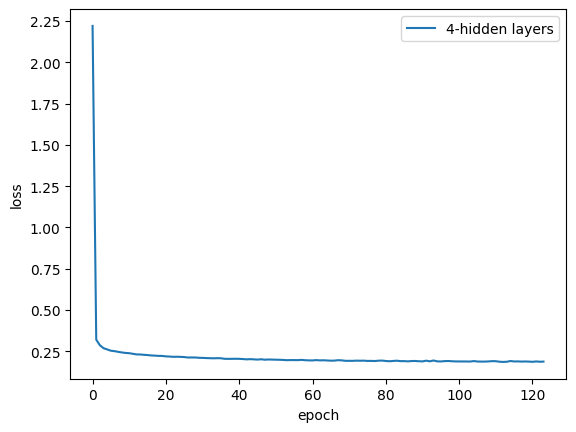

In [17]:
# train the model

# create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001, batch_size=32)

# train the model
model.fit(X_train, y_train)

# test the model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

# extrat the ouput loss and plot it 
loss_values = model.loss_curve_
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.legend(['4-hidden layers'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
# save the model
import pickle
filename = './model/trained/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [19]:
# load the model, sklearn
import pickle
filename = './model/trained/finalized_model.sav'
model = pickle.load(open(filename, 'rb'))
result = model.score(X_test, y_test)
print(result)

# test the model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9285318559556787
0.9285318559556787


In [20]:
# test 
test_sample = X_test[0]
test_sample_label = y_test[0]
print(test_sample)
print(test_sample_label)

print(convert_to_symptoms(test_sample))
print(convert_to_disease(test_sample_label))

# do the prediction, show the posibility of each disease
y_pred = model.predict_proba([test_sample])
print(y_pred)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['vomiting', 'nausea']
Chronic cholestasis
[[3.80375612e-06 1.40516168e-04 7.65662351e-02 1.49624016e-06
  1.56636828e-04 1.29965843e-06 3.51572013e-07 1.24249846e-07
  5.07102676e-01 3.26746362e-06 2.15198121e-07 1.97300129e-02
  8.21106264e-07 6.69687047e-05 1.35544386e-06 2.07210039e-07
  2.11848222e-04 1.01236386e-03 3.38259875e-06 3.38780579e-05
  5.56034337e-07 1.33722211e-04 1.76828010e-06 7.89797476e-06
  8.31755177e-02 3.82482241e-06 3.32024909e-09 8.7794738

In [21]:
# when some symptoms is mussed 
test_sample= X_test[0]

predict = model.predict([test_sample])
print("predict result:", predict)
print("predict result:",convert_to_disease(predict[0]))
print("ground true:",convert_to_disease(y_test[0]))

# 
disease = 'Fungal infection'
symptoms = ['itching','skin_rash','nodal_skin_eruptions','dischromic_patches']

x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)
y = disease_to_label[disease]
predict = model.predict([x])
print(predict)
print("predict result:",convert_to_disease(predict[0]))
print("ground true:",disease)   


# only one symptom
print("--------------only one symptom-----------------")
symptoms = ['itching']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(conver_dis_to_onhot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)


# only two symptom
print("--------------only two symptom-----------------")
symptoms = ['itching','nodal_skin_eruptions']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(conver_dis_to_onhot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)

print("--------------only one symptom-----------------")
disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(conver_dis_to_onhot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)

print("-------------- two symptom-----------------")
disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills','fatigue']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(conver_dis_to_onhot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)

print("-------------- three symptom-----------------")
disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills','fatigue', 'nausea']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(conver_dis_to_onhot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)



predict result: [[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0]]
predict result: Chronic cholestasis
ground true: Chronic cholestasis
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0]]
predict result: Fungal infection
ground true: Fungal infection
--------------only one symptom-----------------
topN: [ 5 22  2 14 40 39 29  8 12 20]
topN: ['Common Cold', 'Impetigo', 'hepatitis A', 'GERD', 'Acne', 'Hepatitis B', 'Jaundice', 'Chronic cholestasis', 'Drug Reaction', 'Fungal infection']
topN: [4.56554401e-04 5.18964103e-04 6.55390301e-04 7.36745150e-04
 7.39153640e-04 2.21577578e-02 5.30386529e-02 6.66738762e-02
 2.79785277e-01 5.46490236e-01]
ground true: Fungal infection
--------------only two symptom-----------------
topN: [37 22 25  9  8  5 18 29 12 20]
topN: ['Dengue', 'Impetigo', 'Urinary tract infection', 'AIDS', 'Chronic cholestasis', 'Common Cold', 'Hypothyroidism', 'Jaundice', 'Drug Reaction', 'Fungal infec

In [22]:
from diagnostic_assistant.model.FCModel import FCModel

disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills','fatigue', 'nausea']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = conver_to_onhot(x)

model = FCModel()
model.predict_topN(x)

print("ground true:",disease)
print([convert_to_disease(conver_dis_to_onhot(label+1)) for label in model.predict_topN(x)[0]])

ground true: Dengue
['Dimorphic hemmorhoids(piles)', 'Hepatitis E', 'Jaundice', 'Hepatitis D', 'Dengue', 'Hyperthyroidism', 'Bronchial Asthma', 'Hypoglycemia', 'Malaria', 'Typhoid']
